In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from collections import Counter
from matplotlib import style
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create a DataFrame for the healthcare-dataset-stroke-data.csv. 
file_path = Path("Resources/alzheimers_disease_data.csv")
alzheimer_df = pd.read_csv(file_path)
alzheimer_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


---
### Data cleaning and preparation process 


In [3]:
# determine the number of rows and columns.
alzheimer_df_rc, alzheimer_df_cc = alzheimer_df.shape
print('Number of total rows:', alzheimer_df_rc)
print('Number of total columns:', alzheimer_df_cc)

Number of total rows: 2149
Number of total columns: 35


In [4]:
# Check all columns inside of the DataFrame
alzheimer_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [5]:
# show duplicates
duplicate = alzheimer_df[alzheimer_df.duplicated()]
print("Duplicate Rows:", len(duplicate), "\n")

Duplicate Rows: 0 



In [6]:
# Check for missing values
alzheimer_df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [7]:
# Drop all rows with missing information 
alzheimer_df = alzheimer_df.dropna(how='any')

In [8]:
# print out columns and number of unique values
for col in alzheimer_df.columns:
    print(col, alzheimer_df[col].nunique())

PatientID 2149
Age 31
Gender 2
Ethnicity 4
EducationLevel 4
BMI 2149
Smoking 2
AlcoholConsumption 2149
PhysicalActivity 2149
DietQuality 2149
SleepQuality 2149
FamilyHistoryAlzheimers 2
CardiovascularDisease 2
Diabetes 2
Depression 2
HeadInjury 2
Hypertension 2
SystolicBP 90
DiastolicBP 60
CholesterolTotal 2149
CholesterolLDL 2149
CholesterolHDL 2149
CholesterolTriglycerides 2149
MMSE 2149
FunctionalAssessment 2149
MemoryComplaints 2
BehavioralProblems 2
ADL 2149
Confusion 2
Disorientation 2
PersonalityChanges 2
DifficultyCompletingTasks 2
Forgetfulness 2
Diagnosis 2
DoctorInCharge 1


---
### Exploratory Data Analysis (EDA)



In [9]:
# Look at the stroke outcome value counts
alzheimer_counts = alzheimer_df['Diagnosis'].value_counts()
alzheimer_counts

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [10]:
# Keep part of columns for abalysis
alzheimer_cleanML_df = alzheimer_df[['Ethnicity', 'Gender', 'Age', 'EducationLevel', 'Diagnosis', 'MemoryComplaints','BehavioralProblems', 'MMSE', 'FunctionalAssessment','ADL']]
alzheimer_cleanML_df

,Ethnicity,Gender,Age,EducationLevel,Diagnosis,MemoryComplaints,BehavioralProblems,MMSE,FunctionalAssessment,ADL
0,0,0,73,2,0,0,0,21.463532,6.518877,1.725883
1,0,0,89,0,0,0,0,20.613267,7.118696,2.592424
2,3,0,73,1,0,0,0,7.356249,5.895077,7.119548
3,0,1,74,1,0,0,1,13.991127,8.965106,6.481226
4,0,0,89,0,0,0,0,13.517609,6.045039,0.014691
...,...,...,...,...,...,...,...,...,...,...
2144,0,0,61,1,1,0,0,1.201190,0.238667,4.492838
2145,0,0,75,2,1,0,1,6.458060,8.687480,9.204952
2146,0,0,77,1,1,0,0,17.011003,1.972137,5.036334
2147,3,1,78,1,1,0,0,4.030491,5.173891,3.785399


**Age: The age of the patients ranges from 60 to 90 years.
**Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
**Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
**EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

In [11]:
# Create new columns for each ethnicity and education level to obtain binary values
alzheimer_cleanML_df['Caucasian'] = (alzheimer_cleanML_df['Ethnicity'] == 0).astype(int)
alzheimer_cleanML_df['African American'] = (alzheimer_cleanML_df['Ethnicity'] == 1).astype(int)
alzheimer_cleanML_df['Asian'] = (alzheimer_cleanML_df['Ethnicity'] == 2).astype(int)
alzheimer_cleanML_df['Other'] = (alzheimer_cleanML_df['Ethnicity'] == 3).astype(int)

alzheimer_cleanML_df['None'] = (alzheimer_cleanML_df['EducationLevel'] == 0).astype(int)
alzheimer_cleanML_df['High School'] = (alzheimer_cleanML_df['EducationLevel'] == 1).astype(int)
alzheimer_cleanML_df['Bachelor\'s'] = (alzheimer_cleanML_df['EducationLevel'] == 2).astype(int)
alzheimer_cleanML_df['Higher'] = (alzheimer_cleanML_df['EducationLevel'] == 3).astype(int)

# Drop the original Ethnicity and EducationLevel columns
alzheimer_cleanML_df = alzheimer_cleanML_df.drop('Ethnicity', axis=1)
alzheimer_cleanML_df = alzheimer_cleanML_df.drop('EducationLevel', axis=1)

# Display the first few rows of the reshaped dataframe
alzheimer_cleanML_df

,Gender,Age,Diagnosis,MemoryComplaints,BehavioralProblems,MMSE,FunctionalAssessment,ADL,Caucasian,African American,Asian,Other,None,High School,Bachelor's,Higher
0,0,73,0,0,0,21.463532,6.518877,1.725883,1,0,0,0,0,0,1,0
1,0,89,0,0,0,20.613267,7.118696,2.592424,1,0,0,0,1,0,0,0
2,0,73,0,0,0,7.356249,5.895077,7.119548,0,0,0,1,0,1,0,0
3,1,74,0,0,1,13.991127,8.965106,6.481226,1,0,0,0,0,1,0,0
4,0,89,0,0,0,13.517609,6.045039,0.014691,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,0,61,1,0,0,1.201190,0.238667,4.492838,1,0,0,0,0,1,0,0
2145,0,75,1,0,1,6.458060,8.687480,9.204952,1,0,0,0,0,0,1,0
2146,0,77,1,0,0,17.011003,1.972137,5.036334,1,0,0,0,0,1,0,0
2147,1,78,1,0,0,4.030491,5.173891,3.785399,0,0,0,1,0,1,0,0


In [12]:
# Prepare the data:
X = alzheimer_cleanML_df.drop('Diagnosis', axis=1)  
y = alzheimer_cleanML_df['Diagnosis']

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Review number of features
print(len(X_train_scaled[0]))

15


In [50]:
# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
# Check the structure of the model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4288 - loss: 0.7341 - val_accuracy: 0.6570 - val_loss: 0.6177
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7266 - loss: 0.5761 - val_accuracy: 0.7733 - val_loss: 0.5140
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8308 - loss: 0.4608 - val_accuracy: 0.7762 - val_loss: 0.4568
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3607 - val_accuracy: 0.7994 - val_loss: 0.4226
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3589 - val_accuracy: 0.8285 - val_loss: 0.3993
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.3379 - val_accuracy: 0.8023 - val_loss: 0.4133
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8849 - loss: 0.3260 - val_accuracy: 0.8285 - val_loss: 0.3946
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 0.3253 - val_accuracy: 0.8401 - v

In [54]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {test_accuracy}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.8909 - loss: 0.4005
Test accuracy: 0.8744186162948608


In [ ]:
filename = 'alzheimer_ML.h5'
model.save(filename)

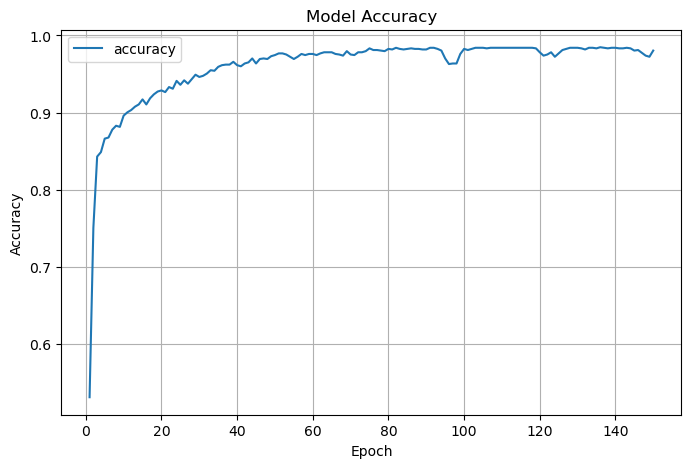

In [55]:
# Plot accuracy of the model
plot_df = pd.DataFrame(history.history, index =  range(1, len(history.history["loss"]) + 1))
plot_df.plot(y = "accuracy", figsize = (8, 5))
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.savefig("model_accuracy_opt.png")
plt.show()